# Association Rule Project by Rashi Kapoor(18csu168) 

#### Problem Statement :
Training association rule models (Apriori and ECLAT) to find the most related values of the various variables and parameters that influence the performance of a secondary school student.
The dataset is extensive with atleast 33 different variables which are then filtered for the most obvious predictors and analysis is a performed to understand the influence of these predictors on the final grades of the students.

#### Attributes for student-mat.csv (Math course) dataset:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the Math course
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

#### Packages Used

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Data Import 

In [47]:
#  Data Loading
dataset = pd.read_csv('student-mat.csv')

In [8]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


#### Data Proprocessing

In [9]:
print("Missing data by columns:")
dataset.isnull().sum()

Missing data by columns:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

As we can see, our dataset is pretty preprocessed, and it contains no missing values.

In [10]:
print("Types of data by columns:")
dataset.dtypes

Types of data by columns:


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

All columns in our dataset are either numerical (integers) or categorical (object).

In [11]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


These are the statistics (count, mean, standard deviation, min, max, etc.) about each numerical columns of the dataset.

#### Simple Exploratory Data Analysis

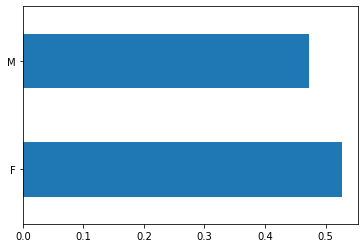

In [12]:
dataset['sex'].value_counts(normalize=True).plot(kind='barh')

We can see that there are more girls (roughly 60%) in the dataset than boys (roughly 40%).

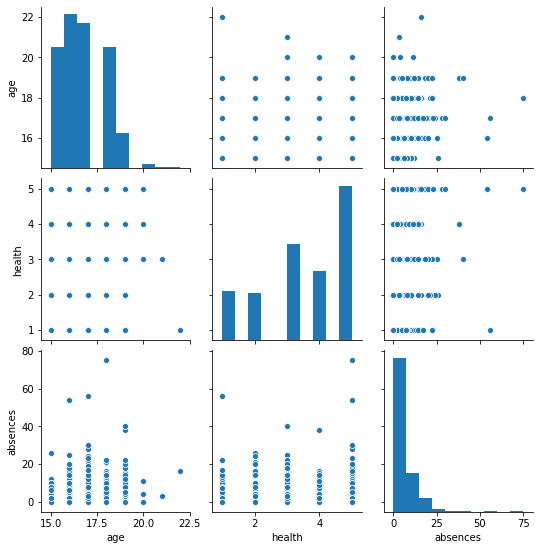

In [13]:
sns.pairplot(data=dataset[['age','health','absences']])

This pairplot shows the distribution of these columns(age, health, absences) at the diagonal and the scatter plots on all other places. Each scatter plot shows the interrelation between two of the specified columns. 

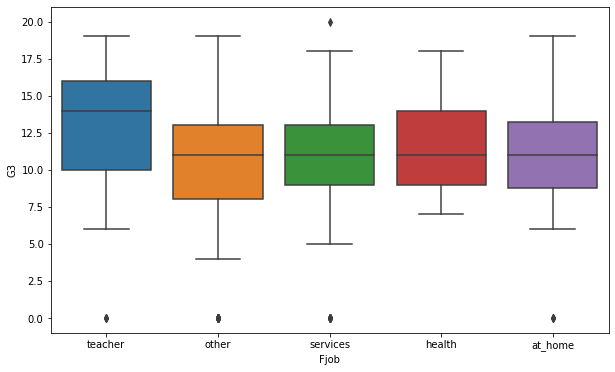

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot( x=dataset["Fjob"], y=dataset["G3"])

This is a boxplot of Father's jobs of students vs their final grades.

And here is the graph for mothers’ jobs:

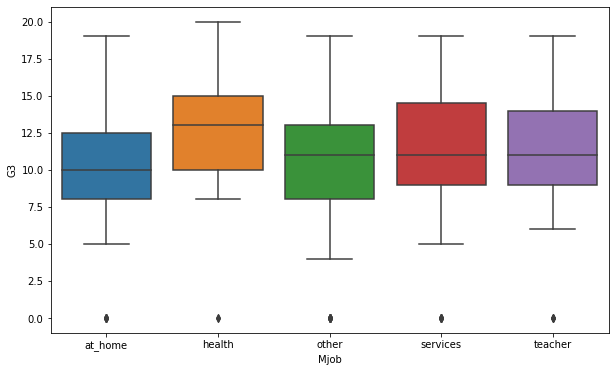

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot( x=dataset["Mjob"], y=dataset["G3"])

Among the interesting insights we can derive from the graphs above is the fact that if the father or mother of the student is a teacher, it is more probable that the student will get a high final grade.

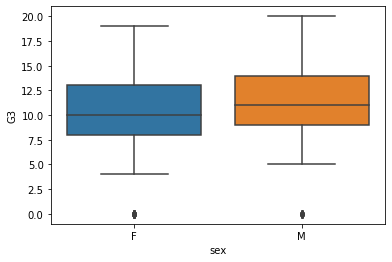

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot( x=dataset["sex"], y=dataset["G3"])

we can see that girls are more successful in their studies than boys.

C:\Users\rashi\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rashi\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rashi\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

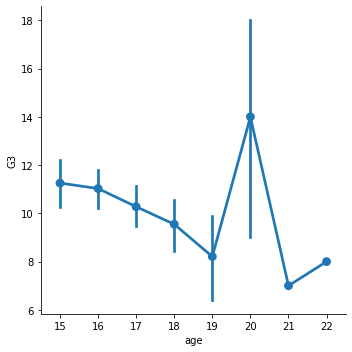

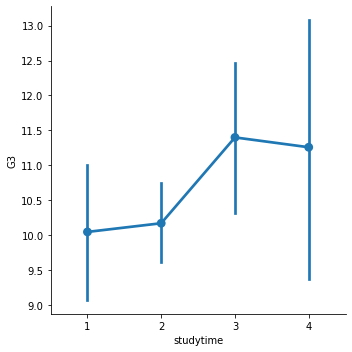

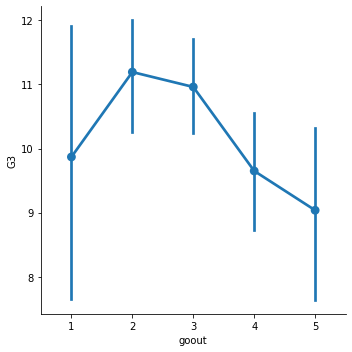

In [17]:
sns.factorplot('age','G3',data = dataset)
sns.factorplot('studytime','G3',data = dataset)
sns.factorplot('goout','G3',data = dataset)

1. As we can see in the figure above, the final score has a trend to go down as a student gets older. The cause of this maybe the distraction of college. 
2. Next, a funny fact is that not always the longer study time get the better results. This rule is only true in a limited of studytime, then if you continue to study you won't get the result that you want.
3. Finally is the plot between time for going out and score. It shows that if you go out "enough", you will achieve the best score.

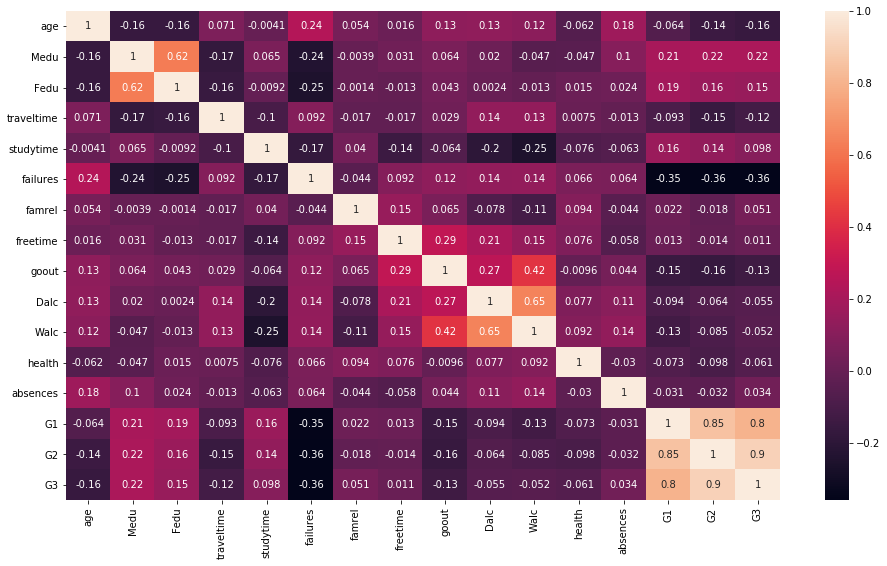

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.corr(),annot=True)

On the heatmap, we can see correlation of the variables with each other. For example, there is a strong correlation between father’s and mother’s education, number of failures and age of the student, etc.

#### Applying Apriori

Apriori  is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules.

For applying Apriori on our dataset, we have filtered out the following parameters to determine the association between them.

In [19]:
dataset.drop(['age','Medu','Fedu','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','internet','romantic','famrel','freetime','goout','Dalc','Walc','absences','G1','G2','G3'],axis=1,inplace=True)

In [20]:
dataset

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,higher,health
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,3
1,GP,F,U,GT3,T,at_home,other,course,father,yes,3
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,3
3,GP,F,U,GT3,T,health,services,home,mother,yes,5
4,GP,F,U,GT3,T,other,other,home,father,yes,5
...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,yes,4
391,MS,M,U,LE3,T,services,services,course,mother,yes,2
392,MS,M,R,GT3,T,other,other,course,other,yes,3
393,MS,M,R,LE3,T,services,other,course,mother,yes,5


The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [21]:
# Adding all customers into a list of lists
transactions = []
for i in range(0, len(dataset)):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 11)])

In [22]:
# Inspecting elements
transactions[:3]

[['GP',
  'F',
  'U',
  'GT3',
  'A',
  'at_home',
  'teacher',
  'course',
  'mother',
  'yes',
  '3'],
 ['GP',
  'F',
  'U',
  'GT3',
  'T',
  'at_home',
  'other',
  'course',
  'father',
  'yes',
  '3'],
 ['GP',
  'F',
  'U',
  'LE3',
  'T',
  'at_home',
  'other',
  'other',
  'mother',
  'yes',
  '3']]

The apriori class requires some parameter values to work:
  <br><br>The first parameter is the list of list that you want to extract rules from. 
 <br> <br>The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. 
    Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions.Suppose we want to find support for item B. This can be calculated as:

<B>Support(B) = (Transactions containing (B))/(Total Transactions)</B>
   <br> <br> Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. 
    Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:

<B>Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)</B>
   <br> <br> Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. 
   Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:
<br><B>Lift(A→B) = (Confidence (A→B))/(Support (B)) </B>
    <br><br>Finally, the min_length parameter specifies the minimum number of items that you want in your rules. 
    

In [23]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.7, min_lift = 3, min_length = 2)

In [24]:
# Visualising the results
results = list(rules)

In [25]:
results

[RelationRecord(items=frozenset({'3', 'health', 'MS'}), support=0.005063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'health', 'MS'}), items_add=frozenset({'3'}), confidence=1.0, lift=4.34065934065934)]),
 RelationRecord(items=frozenset({'MS', 'A', 'LE3'}), support=0.007594936708860759, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A', 'MS'}), items_add=frozenset({'LE3'}), confidence=1.0, lift=3.4649122807017547)]),
 RelationRecord(items=frozenset({'no', 'MS', 'LE3'}), support=0.007594936708860759, ordered_statistics=[OrderedStatistic(items_base=frozenset({'no', 'MS'}), items_add=frozenset({'LE3'}), confidence=1.0, lift=3.4649122807017547)]),
 RelationRecord(items=frozenset({'R', 'reputation', 'MS'}), support=0.010126582278481013, ordered_statistics=[OrderedStatistic(items_base=frozenset({'reputation', 'MS'}), items_add=frozenset({'R'}), confidence=0.8, lift=3.5909090909090913)]),
 RelationRecord(items=frozenset({'no', 'at_home', 'MS'}), suppor

In [26]:
results[10]

RelationRecord(items=frozenset({'R', 'reputation', 'MS', '1'}), support=0.007594936708860759, ordered_statistics=[OrderedStatistic(items_base=frozenset({'reputation', 'MS', '1'}), items_add=frozenset({'R'}), confidence=1.0, lift=4.488636363636364), OrderedStatistic(items_base=frozenset({'R', 'reputation', '1'}), items_add=frozenset({'MS'}), confidence=0.75, lift=6.440217391304348), OrderedStatistic(items_base=frozenset({'R', 'reputation', 'MS'}), items_add=frozenset({'1'}), confidence=0.75, lift=6.303191489361702)])

In [27]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 3 -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: MS -> A
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: no -> MS
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: R -> reputation
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: no -> at_home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.486111111111111
Rule: R -> teacher
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: R -> MS
Support: 0.010126582278481013
Confidence: 0.8
Lift: 6.869565217391305
Rule: R -> MS
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: R -> reputation
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: R -> other
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: R -> reputation
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> T
Suppo

Rule: at_home -> yes
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> yes
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: other -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: other -> mother
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: other -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: reputation -> services
Support: 0.005063291139240506
Confid

Lift: 4.488636363636364
Rule: at_home -> mother
Support: 0.012658227848101266
Confidence: 0.7142857142857142
Lift: 3.206168831168831
Rule: other -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: reputation -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> other
Support: 0.015189873417721518
Confidence: 0.75
Lift: 3.366477272727273
Rule: course -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: teacher -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: reputation -> other
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> mother
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: reputation -> other
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: services -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.291666666666667
Rule:

Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 4.114583333333333
Rule: GT3 -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.7619047619047623
Rule: 3 -> other
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.4725274725274726
Rule: services -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.2554945054945055
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: services -> 3
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.623853211009174
Rule: reputation -> at_home
Support: 0.005063291139240506


Confidence: 1.0
Lift: 3.4649122807017547
Rule: mother -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: mother -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: at_home -> T
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: T -> U
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> T
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> yes
Support: 0.007594936708860759
Confidence: 0.7

Confidence: 0.7142857142857142
Lift: 3.761904761904761
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: mother -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> T
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> yes
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> T
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: services -> T
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: yes -> T
Support: 0.005063291139

Rule: GT3 -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: GT3 -> mother
Support: 0.012658227848101266
Confidence: 0.8333333333333334
Lift: 3.740530303030303
Rule: GT3 -> other
Support: 0.017721518987341773
Confidence: 0.875
Lift: 3.9275568181818183
Rule: GT3 -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: GT3 -> teacher
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> R
Support: 0.020253164556962026
Confidence: 0.8
Lift: 3.5909090909090913
Rule: GT3 -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: GT3 -> other
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.4886

Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: mother -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: other -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: other -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: services -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: re

Lift: 3.4649122807017547
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: course -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: home -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: teacher -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: at_home -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: reputation -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: course -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: reputation -> services
Support: 0.0

Confidence: 1.0
Lift: 4.388888888888889
Rule: services -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: home -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: services -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: teacher -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: teacher -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: at_home -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 19.75
Rule: other -> mother
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: other -> R
Support: 0.0050632911

Confidence: 1.0
Lift: 4.388888888888889
Rule: course -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.291666666666667
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: services -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: at_home -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: teacher -> at_home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: other -

Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.34065934065934
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: 3 -> other
Support: 0.010126582278481013
Confidence: 1.0
Lift: 4.34065934065934
Rule: reputation -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.2554945054945055
Rule: services -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.2554945054945055
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: 3 -> home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> 3
Sup

Lift: 4.388888888888889
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: teacher -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: mother -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: teacher -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: teacher -> mother
Support: 0.005063291139240506
Confi

Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.984848484848484
Rule: GT3 -> at_home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> teacher
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.761904761

Rule: reputation -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: teacher -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: teacher -> R
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.291666666666667
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: teacher -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: teacher -> services
Support: 0.005063291139240506
Co

Rule: other -> mother
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: course -> at_home
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: at_home -> mother
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: teacher -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> mother
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: at_home -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: teacher -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> at_home
Support: 0.007594936708860759
Con

Lift: 4.388888888888889
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> at_home
Support: 0.00506

Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: GT3 -> other
Support: 0.012658227848101266
Confidence: 0.8333333333333334
Lift: 3.740530303030303
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: GT3 -> mother
Support: 0.012658227848101266
Confidence: 0.8333333333333334
Lift: 3.740530303030303
Rule: GT3 -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: GT3 -> other
Support: 0.02278481012658228
Confidence: 0.8181818181818182
Lift: 3.672520661157025
Rule: GT3 -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: course -> GT3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: GT3 -> other
Support: 0.010126582278481013
Confidence: 0.8
Lift: 3.5909090909090913
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
L

Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: teacher -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> teacher
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> teacher
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.266666666666667
Rule: reputation -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: teacher -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.9499999999999997
Rule: reputation -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: course -> teacher
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> teacher
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> teacher
Su

Rule: services -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.2554945054945055
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: services -> 3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.2554945054945055
Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.34065934065934
Rule: reput

Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: services -> 3
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: 3 -> home


Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> mother
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> teacher
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.9499999999999997
Rule: reputation -> services
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> services
Support: 0.007594936708860759
Confidence: 0.75
Lift: 3.366477272727273
Rule: reputation -> servi

Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: services -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: at_home -> GP
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.46491228070

Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: home -> mother
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> home
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: reputation -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: teacher -> mother
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: reputation -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: other -> home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> home
Support: 0.010126582278481013
Confidence: 1.0
Lift:

Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: reputation -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.388888888888889
Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: services -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: GT3 -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.623853211009174
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363

Lift: 4.488636363636364
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 4.488636363636364
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.7619047619047623
Rule: services -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: other -> home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> home
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: reputation -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Support: 0.007594936708860759
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Support: 0.010126582278481013
Confidence: 1.0
Lift: 3.4649122807017547
Rule: services -> other
Supp

In [28]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

In [29]:
lift

[4.34065934065934,
 3.4649122807017547,
 3.4649122807017547,
 3.5909090909090913,
 5.486111111111111,
 3.366477272727273,
 6.869565217391305,
 3.366477272727273,
 3.7619047619047623,
 3.5909090909090913,
 4.488636363636364,
 6.303191489361702,
 6.303191489361702,
 4.488636363636364,
 4.488636363636364,
 3.623853211009174,
 3.4649122807017547,
 8.58695652173913,
 6.440217391304348,
 3.623853211009174,
 4.488636363636364,
 3.366477272727273,
 3.623853211009174,
 3.623853211009174,
 4.34065934065934,
 4.34065934065934,
 8.58695652173913,
 4.34065934065934,
 5.486111111111111,
 3.4649122807017547,
 4.34065934065934,
 4.34065934065934,
 5.486111111111111,
 8.58695652173913,
 3.2554945054945055,
 4.34065934065934,
 4.34065934065934,
 8.58695652173913,
 5.486111111111111,
 3.4649122807017547,
 3.4649122807017547,
 4.114583333333333,
 3.4649122807017547,
 3.4649122807017547,
 4.488636363636364,
 4.114583333333333,
 5.486111111111111,
 3.366477272727273,
 3.4649122807017547,
 3.4649122807017547

#### Visualizing results in a dataframe

In [30]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [31]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False).head(10)

,Association,Lift
2061,"[at_home, M, R, T, no, LE3]",19.75
4016,"[at_home, other, M, R, T, no, LE3]",19.75
2182,"[services, at_home, M, T, no, father]",19.75
2516,"[course, GT3, services, M, T, no, 2]",19.75
2465,"[course, services, M, GP, U, no, 2]",19.75
2164,"[services, at_home, M, T, no, MS]",19.75
939,"[course, GT3, services, M, no, 2]",19.75
3564,"[at_home, other, R, T, no, 5, LE3]",19.75
3563,"[at_home, mother, R, T, no, 5, LE3]",19.75
1677,"[at_home, R, T, no, 5, LE3]",19.75


By the study, the above mentioned are the most commom combined attributes having a lift of 19.75

In [32]:
# Show bottom 10 higher lift scores
rank.sort_values('Lift', ascending=True).head(10)

,Association,Lift
2665,"[reputation, 3, mother, other, GP, R, F]",3.00952
4347,"[reputation, GT3, mother, M, yes, T, U, 2]",3.00952
2729,"[reputation, 3, mother, other, R, T, F]",3.00952
1862,"[reputation, other, R, T, F, LE3]",3.00952
2682,"[reputation, GT3, 3, other, R, T, F]",3.00952
2634,"[reputation, GT3, 3, GP, R, T, F]",3.00952
4280,"[reputation, GT3, mother, M, GP, yes, U, 2]",3.00952
4440,"[reputation, 3, mother, other, GP, R, T, F]",3.00952
2528,"[reputation, GT3, mother, M, yes, U, 2]",3.00952
4275,"[reputation, GT3, mother, M, GP, yes, T, 2]",3.00952


#### Applying ECLAT

This is an implementation of the ECLAT. It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of items. 


In [33]:
# Putting all transactions in a single list
items = []
for i in range(0, len(transactions)):
    items.extend(transactions[i])

# Finding unique items from transactions
uniqueItems = list(set(items))

In [34]:
uniqueItems

['reputation',
 'services',
 'other',
 'mother',
 'health',
 'R',
 'yes',
 'U',
 'LE3',
 'MS',
 'teacher',
 'at_home',
 'home',
 'GP',
 'T',
 'no',
 '2',
 '5',
 'father',
 '3',
 'M',
 'F',
 'course',
 'GT3',
 'A',
 '1',
 '4']

#### Creatiing combinations - pairs

In [35]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;       

In [36]:
pair

[['reputation', 'services'],
 ['reputation', 'other'],
 ['reputation', 'mother'],
 ['reputation', 'health'],
 ['reputation', 'R'],
 ['reputation', 'yes'],
 ['reputation', 'U'],
 ['reputation', 'LE3'],
 ['reputation', 'MS'],
 ['reputation', 'teacher'],
 ['reputation', 'at_home'],
 ['reputation', 'home'],
 ['reputation', 'GP'],
 ['reputation', 'T'],
 ['reputation', 'no'],
 ['reputation', '2'],
 ['reputation', '5'],
 ['reputation', 'father'],
 ['reputation', '3'],
 ['reputation', 'M'],
 ['reputation', 'F'],
 ['reputation', 'course'],
 ['reputation', 'GT3'],
 ['reputation', 'A'],
 ['reputation', '1'],
 ['reputation', '4'],
 ['services', 'other'],
 ['services', 'mother'],
 ['services', 'health'],
 ['services', 'R'],
 ['services', 'yes'],
 ['services', 'U'],
 ['services', 'LE3'],
 ['services', 'MS'],
 ['services', 'teacher'],
 ['services', 'at_home'],
 ['services', 'home'],
 ['services', 'GP'],
 ['services', 'T'],
 ['services', 'no'],
 ['services', '2'],
 ['services', '5'],
 ['services', 'fa

#### Calculating score
The calculation is done looking at the number of customers that bought both items (the pair) and divided by all customers of the week (7501). This calculation is done for all pairs possible and the score is returned on "score" list.

$ score = \frac{\text{number of lists that contain [item x and item y]}} {\text{number of all lists}} $

In [37]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    score.append(len(eval(mycode))/7501.)

Wall time: 51.5 ms


#### Showing results

In [38]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

#### Top 10 Most common pairs 

In [39]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
148,"[yes, T]",0.0446607
147,"[yes, GP]",0.0442608
260,"[GP, T]",0.0414611
141,"[yes, U]",0.0390615
166,"[U, GP]",0.0381282
167,"[U, T]",0.0363951
54,"[other, yes]",0.0357286
157,"[yes, GT3]",0.0355953
281,"[T, GT3]",0.034662
77,"[mother, yes]",0.0345287


#### Bottom 10

In [40]:
ranking_ECLAT.sort_values('Score', ascending=True).head(10)

,Pair,Score
350,"[1, 4]",0
21,"[reputation, course]",0
89,"[mother, father]",0
108,"[health, no]",0
330,"[M, F]",0
121,"[R, U]",0
296,"[2, 5]",0
255,"[home, course]",0
298,"[2, 3]",0
314,"[5, 4]",0


#### for trios

In [41]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [42]:
trio[:10]

[['reputation', 'services', 'other'],
 ['reputation', 'services', 'mother'],
 ['reputation', 'services', 'health'],
 ['reputation', 'services', 'R'],
 ['reputation', 'services', 'yes'],
 ['reputation', 'services', 'U'],
 ['reputation', 'services', 'LE3'],
 ['reputation', 'services', 'MS'],
 ['reputation', 'services', 'teacher'],
 ['reputation', 'services', 'at_home']]

In [43]:
%%time
score_trio = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    score_trio.append(len(eval(mycode))/7501.)

Wall time: 408 ms


In [44]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

,Trio,Score
1295,"[yes, GP, T]",0.0393281
1316,"[yes, T, GT3]",0.0329289
1304,"[yes, GP, GT3]",0.0317291
629,"[other, yes, T]",0.0315958
628,"[other, yes, GP]",0.0311958
741,"[other, GP, T]",0.0290628
931,"[mother, GP, T]",0.0286628
622,"[other, yes, U]",0.0273297
647,"[other, U, GP]",0.0267964
837,"[mother, U, GP]",0.0259965


In [45]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=True).head(10)

,Trio,Score
1546,"[home, 1, 4]",0
339,"[services, mother, father]",0
1079,"[health, home, course]",0
215,"[reputation, at_home, course]",0
1394,"[U, no, A]",0
532,"[services, T, A]",0
1072,"[health, home, no]",0
211,"[reputation, at_home, father]",0
1125,"[health, 2, course]",0
1069,"[health, at_home, 4]",0


<B> Now, Just out of our curiosity, We have once again applied the apriori algorithm, taking one different parameter than earlier (the new parameter taken is 'Freetime') to determine the association rules. We also changed the values for min_support, min_confidence and min_lift, to experiment more with our dataset. </B>

In [48]:
dataset.drop(['age','Medu','Fedu','traveltime','studytime','failures','schoolsup','famsup','paid','higher','nursery','internet','romantic','famrel','health','goout','Dalc','Walc','absences','G1','G2','G3'],axis=1,inplace=True)

In [49]:
dataset

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,activities,freetime
0,GP,F,U,GT3,A,at_home,teacher,course,mother,no,3
1,GP,F,U,GT3,T,at_home,other,course,father,no,3
2,GP,F,U,LE3,T,at_home,other,other,mother,no,3
3,GP,F,U,GT3,T,health,services,home,mother,yes,2
4,GP,F,U,GT3,T,other,other,home,father,no,3
...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,5
391,MS,M,U,LE3,T,services,services,course,mother,no,4
392,MS,M,R,GT3,T,other,other,course,other,no,5
393,MS,M,R,LE3,T,services,other,course,mother,no,4


In [50]:
# Adding all customers into a list of lists
transactions = []
for i in range(0, len(dataset)):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 11)])

In [51]:
# Inspecting elements
transactions[:5]

[['GP',
  'F',
  'U',
  'GT3',
  'A',
  'at_home',
  'teacher',
  'course',
  'mother',
  'no',
  '3'],
 ['GP',
  'F',
  'U',
  'GT3',
  'T',
  'at_home',
  'other',
  'course',
  'father',
  'no',
  '3'],
 ['GP',
  'F',
  'U',
  'LE3',
  'T',
  'at_home',
  'other',
  'other',
  'mother',
  'no',
  '3'],
 ['GP',
  'F',
  'U',
  'GT3',
  'T',
  'health',
  'services',
  'home',
  'mother',
  'yes',
  '2'],
 ['GP', 'F', 'U', 'GT3', 'T', 'other', 'other', 'home', 'father', 'no', '3']]

In [52]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.6, min_lift = 5, min_length = 2)

In [53]:
# Visualising the results
results = list(rules)

In [54]:
results

[RelationRecord(items=frozenset({'A', 'teacher', '1'}), support=0.005063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'teacher', '1'}), items_add=frozenset({'A'}), confidence=0.6666666666666667, lift=6.422764227642277)]),
 RelationRecord(items=frozenset({'health', 'LE3', '1'}), support=0.007594936708860759, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LE3', '1'}), items_add=frozenset({'health'}), confidence=0.6, lift=5.1521739130434785)]),
 RelationRecord(items=frozenset({'teacher', 'A', 'GP', '1'}), support=0.005063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'teacher', 'GP', '1'}), items_add=frozenset({'A'}), confidence=0.6666666666666667, lift=6.422764227642277)]),
 RelationRecord(items=frozenset({'teacher', 'A', 'U', '1'}), support=0.005063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A', 'U', '1'}), items_add=frozenset({'teacher'}), confidence=1.0, lift=5.266666666666667), OrderedStat

In [55]:
results[0]

RelationRecord(items=frozenset({'A', 'teacher', '1'}), support=0.005063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'teacher', '1'}), items_add=frozenset({'A'}), confidence=0.6666666666666667, lift=6.422764227642277)])

<B>The first item in the list is a list itself containing three items. 

The first item of the list shows the performance measures in the rule.

For instance from the first item, we can see that it is very common for a student to get very less freetime who is the child of a parent who is a teacher and live apart from the spouse.

The support value for the first rule is 0.005. 

The confidence level for the rule is 0.67 which shows that out of all the transactions that contain 'teacher and 1', 67% of the transactions also contain 'A'. 

Finally, the lift of 6.422 tells us that a student whose parents live apart is 6.4 times more likely to be child of a teacher and gets very less freetime, compared to the default .</B>

In [56]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: A -> teacher
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: health -> LE3
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: teacher -> A
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: teacher -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: mother -> A
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.634146341463415
Rule: teacher -> A
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: LE3 -> health
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: health -> M
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: health -> U
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: mother -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputatio

Lift: 8.58695652173913
Rule: other -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: other -> R
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.583333333333334
Rule: home -> mother
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.583333333333334
Rule: home -> A
Support: 0.007594936708860759
Confidence: 0.75
Lift: 7.225609756097561
Rule: GT3 -> home
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.780487804878049
Rule: home -> A
Support: 0.007594936708860759
Confidence: 0.75
Lift: 7.225609756097561
Rule: other -> home
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.780487804878049
Rule: services -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.634146341463415
Rule: home -> A
Support: 0.007594936708860759
Confidence: 0.75
Lift: 7.225609756097561
Rule: services -> home
Support: 0.005063291139240506
Con

Lift: 6.171875
Rule: home -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: services -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: reputation -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> health
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: GT3 -> R
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: GT3 -> R
Support: 0.0

Rule: teacher -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 8.58695652173913
Rule: GT3 -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 8.58695652173913
Rule: GT3 -> home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: GT3 -> other
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: GT3 -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: M -> R
Support: 0.005063291139240506
Confidence

Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: reputation -> mother
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: services -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: other -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.634146341463415
Rule: services -> other
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.780487804878049
Rule: course -> at_home
Support: 0.007594936708860759
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> other
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: GT3 -> teacher
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421

Rule: at_home -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: at_home -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> 1
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 13.859649122807019
Rule: reputation -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 20.789473684210527
Rule: reputation -> mother
Support: 0.005063291139240506
Conf

Lift: 6.171875
Rule: services -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: teacher -> R
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: at_home -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: reputation -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: other -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: health -> yes
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: services -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: other -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> health
Support: 0.00506

Rule: reputation -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: 3 -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.634146341463415
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: 3 -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 0.6

Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: services -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: GT3 -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: mother -> R
Support: 0.005063291139240506
Confi

Rule: GT3 -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.583333333333334
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.875
Rule: course -> services
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.583333333333334
Rule: teacher -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: course -> M
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: other -> mother
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: other -> M
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> mother
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: other -> mother
Support: 0.005063291139

Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: course -> teacher
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.266666666666667
Rule: at_home -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: other -> home
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: services -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: services -> other
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: course -> at_home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: services -> other
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> at_home
Support: 0.005063291139240506
Confidence: 1.0
Lift: 5.486111111111111
Rule: course -> at_home
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.1521739130434785
Rule: course -> services
Support: 0.00506329113924050

Lift: 5.724637681159421
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> 3
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.780487804878049
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> 3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 9.634146341463415
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 0.6
Lift: 5.780487804878049
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: 3 -> home
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 6.422764227642277
Rule: reputation -> 3
Support: 0.005063291139240506
Confidence:

Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> health
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: GT3 -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: GT3 -> services
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: course -> GT3
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: other -> health
Support: 0.005063291139240506
Confidence: 1.0
Lift: 8.58695652173913
Rule: services -> other
Support: 0.005063291139240506
Confidence: 1.0
Lift: 6.171875
Rule: reputation -> GT3
Support: 0.005063291139240506
Confidence: 0.6666666666666667
Lift: 5.724637681159421
Rule: reputation -> GT3
Support: 0.007594936708860759
Confidence: 0.75
Lift: 6.440217391304348
Rule: G

In [57]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

In [58]:
lift

[6.422764227642277,
 5.1521739130434785,
 6.422764227642277,
 5.266666666666667,
 9.634146341463415,
 6.422764227642277,
 5.1521739130434785,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 6.440217391304348,
 6.171875,
 5.724637681159421,
 8.58695652173913,
 5.724637681159421,
 6.171875,
 5.724637681159421,
 6.440217391304348,
 5.266666666666667,
 5.266666666666667,
 5.724637681159421,
 6.440217391304348,
 5.780487804878049,
 9.634146341463415,
 6.583333333333334,
 8.58695652173913,
 8.58695652173913,
 6.133540372670807,
 5.780487804878049,
 5.724637681159421,
 5.1521739130434785,
 5.1521739130434785,
 5.1521739130434785,
 5.486111111111111,
 8.58695652173913,
 5.266666666666667,
 9.634146341463415,
 6.422764227642277,
 13.859649122807019,
 5.266666666666667,
 5.266666666666667,
 9.634146341463415,
 5.486111111111111,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 5.724637681159421,
 5.7246376811594

In [59]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [60]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False).head(10)

,Association,Lift
2395,"[reputation, services, GP, 1, R, T, F, no, LE3]",20.7895
986,"[reputation, services, mother, 1, R, F, LE3]",20.7895
2392,"[reputation, mother, GP, 1, R, T, F, no, LE3]",20.7895
2394,"[reputation, services, mother, GP, 1, R, T, F,...",20.7895
1871,"[GT3, at_home, home, mother, other, GP, 1, R]",20.7895
339,"[reputation, services, 1, R, no, LE3]",20.7895
2396,"[reputation, services, mother, GP, 1, R, F, no...",20.7895
345,"[at_home, home, mother, other, 1, R]",20.7895
2397,"[reputation, services, mother, GP, 1, R, T, F,...",20.7895
2400,"[reputation, services, mother, 1, R, T, F, no,...",20.7895


By the study, the above mentioned are the most commom combined attributes having a lift of 20.78

In [61]:
# Show bottom 10 lift scores
rank.sort_values('Lift', ascending=True).head(10)

,Association,Lift
441,"[GT3, R, T, no, 2, MS]",5.15217
1786,"[course, services, M, T, no, LE3, MS]",5.15217
1790,"[course, services, M, U, no, LE3, MS]",5.15217
1793,"[course, at_home, T, U, no, LE3, MS]",5.15217
512,"[other, health, yes, U, 2, father]",5.15217
1809,"[services, other, M, R, T, no, MS]",5.15217
534,"[course, at_home, 3, F, LE3, MS]",5.15217
535,"[course, 3, F, LE3, no, MS]",5.15217
1813,"[course, at_home, T, U, no, father, MS]",5.15217
1815,"[course, services, at_home, T, U, no, MS]",5.15217
